# Assignment 4

This is an basecode for assignment 4 of Artificial Intelligence class (CSCE-4613), Spring 2025


In [ ]:
import torch
import torch.nn as nn
import torchvision
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

## Binary Network

## Define a binary network class


In [ ]:
class BinaryNetwork(nn.Module):
  def __init__(self):
      input_dim = 2
      hidden_dim = 4
      output_dim = 1
      super(BinaryNetwork, self).__init__()
      # First layer: from 2 input features to hidden_dim features.
      self.fc1 = nn.Linear(input_dim, hidden_dim)
      # Second layer: from hidden_dim features to 1 output.
      self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
        # Apply a non-linear activation function to the hidden layer.
        x = torch.sigmoid(self.fc1(x))
        # Final output with sigmoid activation for binary prediction.
        x = torch.sigmoid(self.fc2(x))
        return x


### Define data generator

In [ ]:
def generate_data(operator = "AND"):
  assert operator in ["AND", "OR", "XOR", "NOR"], "%s operator is not valid" % operator
  data = []
  label = []
  for i in range(2):
    for j in range(2):
      data.append([i, j])
      if operator == "AND":
        label.append(i & j)
      elif operator == "OR":
        label.append(i | j)
      elif operator == "XOR":
        label.append(i ^ j)
      else:
        label.append(not (i | j))
  data = torch.as_tensor(data, dtype = torch.float32)
  label = torch.as_tensor(label, dtype = torch.float32)
  print("Label: {label}".format(label = label))
  return data, label

### Define the training framework

Label: tensor([0., 0., 0., 1.])
BinaryNetwork(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)
Epoch [100/1000] - Overall Accuracy: 1.00 - Loss: 0.0171
Epoch [200/1000] - Overall Accuracy: 1.00 - Loss: 0.0071
Epoch [300/1000] - Overall Accuracy: 1.00 - Loss: 0.0044
Epoch [400/1000] - Overall Accuracy: 1.00 - Loss: 0.0031
Epoch [500/1000] - Overall Accuracy: 1.00 - Loss: 0.0024
Epoch [600/1000] - Overall Accuracy: 1.00 - Loss: 0.0020
Epoch [700/1000] - Overall Accuracy: 1.00 - Loss: 0.0017
Epoch [800/1000] - Overall Accuracy: 1.00 - Loss: 0.0015
Epoch [900/1000] - Overall Accuracy: 1.00 - Loss: 0.0013
Epoch [1000/1000] - Overall Accuracy: 1.00 - Loss: 0.0011
Final Accuracy for AND: 1.00
Label: tensor([0., 1., 1., 1.])
BinaryNetwork(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)
Epoch [100/1000] - Overall Accuracy: 1.00 - Loss: 0.0001
Epoch [200/10

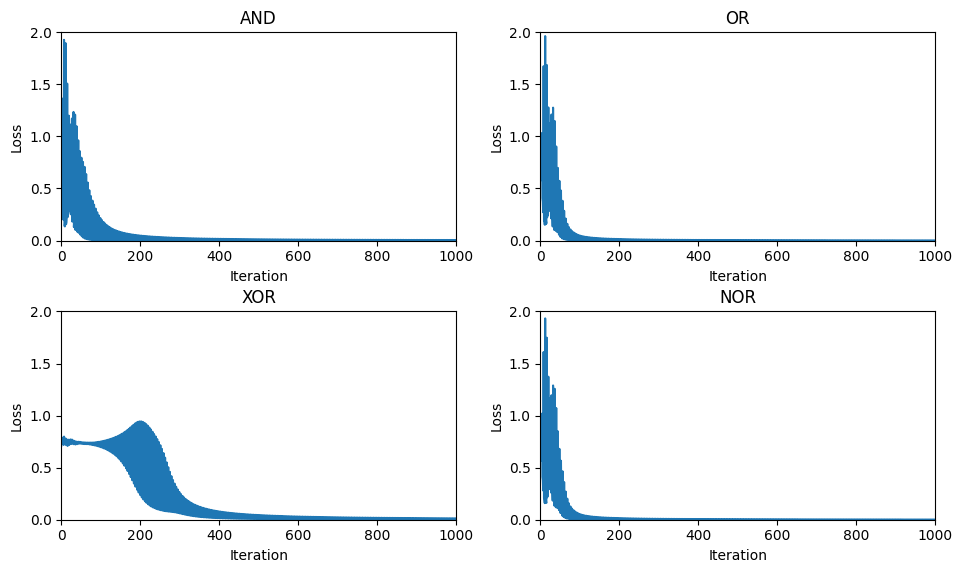

In [ ]:

# operator = "XOR"
# inputs, labels = generate_data(operator = operator)

n_iters = 1000 # Epochs
batch_size = 1
learning_rate = 0.2
losses_and = []
losses_or = []
losses_xor = []
losses_nor = []

for operator in ["AND", "OR", "XOR", "NOR"]:
  inputs, labels = generate_data(operator = operator)
  model = BinaryNetwork()
  model.train()
  print(model)
  loss_fn = nn.BCELoss()
  optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
  losses = []

  for i in range(1, n_iters + 1):
    for j in range(0, len(inputs), batch_size):
      batch_inputs = inputs[j:j+batch_size]
      batch_labels = labels[j:j+batch_size].unsqueeze(1)
      outputs = model(batch_inputs)
      loss = loss_fn(outputs, batch_labels)
      losses.append(loss.item())
      accuracy = (outputs.round() == batch_labels.unsqueeze(1)).float()
      optim.zero_grad()
      loss.backward()
      optim.step()

    if i % 100 == 0:
      with torch.no_grad():
          outputs = model(inputs)
          predicted = outputs.round()
          overall_accuracy = (predicted == labels.unsqueeze(1)).float().mean()
      print("Epoch [%d/%d] - Overall Accuracy: %0.2f - Loss: %0.4f" % (i, n_iters, overall_accuracy, loss))

  model.eval()
  with torch.no_grad():
      outputs = model(inputs)
      predicted = outputs.round()
      final_accuracy = (predicted == labels.unsqueeze(1)).float().mean()
  print("Final Accuracy for %s: %0.2f" % (operator, final_accuracy))

  if operator == "AND":
    losses_and = losses
  elif operator == "OR":
    losses_or = losses
  elif operator == "XOR":
    losses_xor = losses
  else:
    losses_nor = losses

  torch.save(model.state_dict(), "%s_Network.pth" % operator)


# model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

# Create a figure and an array of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Adjust spacing between subplots
fig.tight_layout(pad=3.0)

# Plot data for each operator in a separate subplot
axs[0, 0].plot(losses_and)
axs[0, 0].set_title('AND')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_xlim(0, 1000)
axs[0, 0].set_ylim(0, 2)

axs[0, 1].plot(losses_or)
axs[0, 1].set_title('OR')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_xlim(0, 1000)
axs[0, 1].set_ylim(0, 2)

axs[1, 0].plot(losses_xor)
axs[1, 0].set_title('XOR')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_xlim(0, 1000)
axs[1, 0].set_ylim(0, 2)

axs[1, 1].plot(losses_nor)
axs[1, 1].set_title('NOR')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_xlim(0, 1000)
axs[1, 1].set_ylim(0, 2)

# Display the figure with subplots
plt.show()


## Digit Classification

### Define Digit Classification Network

In [ ]:
class DigitNetwork(nn.Module):
  def __init__(self):
    super(DigitNetwork, self).__init__()
    input_dim = 784 # Number of pixels in a 28x28 image.
    hidden_dim = 128 # Arbitrary number of hidden dimensions.
    output_dim = 10 # Output of 0-9
    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.layer2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # x has the size of (batch size x 1 x height x height)
    x = x.view(-1, 784)
    x = torch.relu(self.layer1(x))
    x = torch.relu(self.layer2(x))
    return x


### Define Data Generator

In [ ]:
def create_data_generator(batch_size = 32, root = "data"):
  train_dataset = torchvision.datasets.MNIST(root = root,
                                             train = True,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  test_dataset = torchvision.datasets.MNIST(root = root,
                                             train = False,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size = batch_size,
                                             shuffle = True)
  test_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size = batch_size,
                                             shuffle = False)
  return train_loader, test_loader

### Define the training framework

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.85MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.92MB/s]


DigitNetwork(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch [1/6]. Iter [1/1875]. Loss: 2.31. Accuracy: 0.00
Epoch [1/6]. Iter [101/1875]. Loss: 0.91. Accuracy: 0.53
Epoch [1/6]. Iter [201/1875]. Loss: 1.29. Accuracy: 0.57
Epoch [1/6]. Iter [301/1875]. Loss: 1.18. Accuracy: 0.59
Epoch [1/6]. Iter [401/1875]. Loss: 1.08. Accuracy: 0.60
Epoch [1/6]. Iter [501/1875]. Loss: 1.01. Accuracy: 0.61
Epoch [1/6]. Iter [601/1875]. Loss: 0.94. Accuracy: 0.62
Epoch [1/6]. Iter [701/1875]. Loss: 1.11. Accuracy: 0.62
Epoch [1/6]. Iter [801/1875]. Loss: 0.75. Accuracy: 0.62
Epoch [1/6]. Iter [901/1875]. Loss: 0.92. Accuracy: 0.63
Epoch [1/6]. Iter [1001/1875]. Loss: 1.02. Accuracy: 0.63
Epoch [1/6]. Iter [1101/1875]. Loss: 0.54. Accuracy: 0.64
Epoch [1/6]. Iter [1201/1875]. Loss: 0.51. Accuracy: 0.65
Epoch [1/6]. Iter [1301/1875]. Loss: 0.58. Accuracy: 0.65
Epoch [1/6]. Iter [1401/1875]. Loss: 1.11. Accuracy: 0.

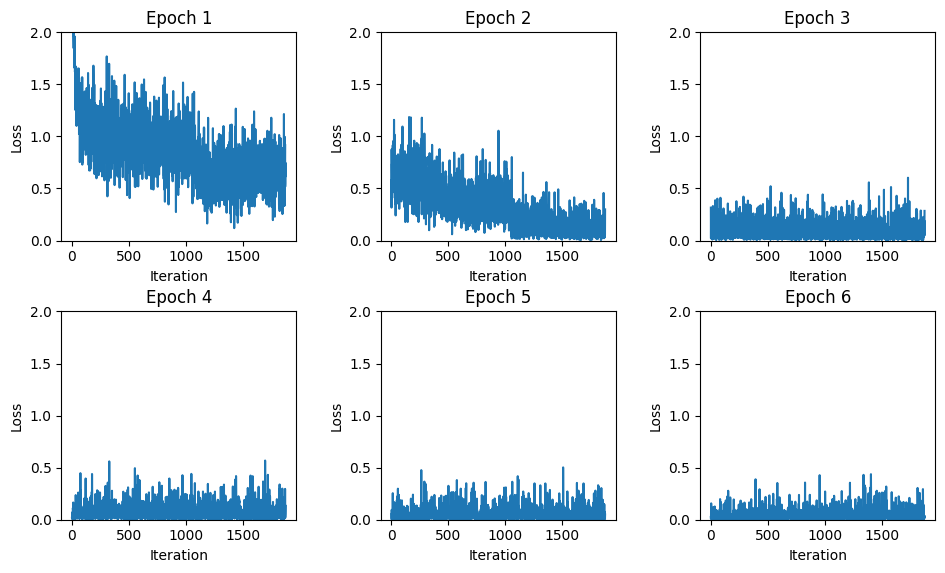

In [ ]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork()
print(model)
if cuda:
  model.cuda()
n_epochs = 6
learning_rate = 0.2
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.1)
loss_fn = nn.CrossEntropyLoss()
losses = []

start_time = time.time()

model.train()
for epoch in range(1, n_epochs + 1):
  correct = 0 # new line
  total = 0 # new line
  epoch_specific_loss = []
  iteration_times = []
  for idx, (images, labels) in enumerate(train_loader):
    iteration_start_time = time.time()

    if cuda:
      images = images.cuda()
      labels = labels.cuda()

    optim.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)

    iteration_end_time = time.time()
    iteration_time = iteration_end_time - iteration_start_time
    iteration_times.append(iteration_time)

    predicted_labels = outputs.argmax(dim=1, keepdim=True)  # new line
    correct += predicted_labels.eq(labels.view_as(predicted_labels)).sum().item() # new line
    total += labels.size(0)  # new line
    epoch_specific_loss.append(loss.item())


    loss.backward()
    optim.step()

    if idx % 100 == 0:
      accuracy = correct/total # new line
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))
    # Final accuracy for the epoch
  epoch_accuracy = correct / len(train_loader.dataset)
  print(f"Epoch [{epoch}/{n_epochs}] Completed - Accuracy: {epoch_accuracy:.4f}")
  print(f"Average Iteration Time: {sum(iteration_times) / len(iteration_times):.4f} seconds")
  losses.append(epoch_specific_loss)

print("Total Training Time: %0.2f" % (time.time() - start_time))
torch.save(model.state_dict(), "MNIST_Network.pth") # new line

# model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

# Create a figure and an array of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Adjust spacing between subplots
fig.tight_layout(pad=3.0)

epoch_num = 0
for i in range(0, 2):
  for j in range(0, 3):
    epoch_specific_loss = losses[epoch_num]
    axs[i, j].plot(epoch_specific_loss)
    axs[i, j].set_title('Epoch %d' % (epoch_num + 1))
    axs[i, j].set_xlabel('Iteration')
    axs[i, j].set_ylabel('Loss')
    axs[i, j].set_ylim(0, 2)
    epoch_num += 1


plt.show()


### Define the evaluation framework

Iter [1/10000]. Accuracy: 1.0000
Iter [501/10000]. Accuracy: 1.0000
Iter [1001/10000]. Accuracy: 1.0000
Iter [1501/10000]. Accuracy: 0.0000
Iter [2001/10000]. Accuracy: 1.0000
Iter [2501/10000]. Accuracy: 1.0000
Iter [3001/10000]. Accuracy: 1.0000
Iter [3501/10000]. Accuracy: 1.0000
Iter [4001/10000]. Accuracy: 1.0000
Iter [4501/10000]. Accuracy: 1.0000
Iter [5001/10000]. Accuracy: 1.0000
Iter [5501/10000]. Accuracy: 1.0000
Iter [6001/10000]. Accuracy: 1.0000
Iter [6501/10000]. Accuracy: 1.0000
Iter [7001/10000]. Accuracy: 1.0000
Iter [7501/10000]. Accuracy: 1.0000
Iter [8001/10000]. Accuracy: 1.0000
Iter [8501/10000]. Accuracy: 1.0000
Iter [9001/10000]. Accuracy: 1.0000
Iter [9501/10000]. Accuracy: 0.0000
Final Accuracy: 0.9761
Confusion matrix, without normalization
[[ 969    1    0    1    0    2    3    0    2    2]
 [   0 1123    3    1    0    2    4    0    2    0]
 [   3    4  996    2    6    1    6    8    4    2]
 [   0    0    4  990    0    9    0    1    2    4]
 [   3   

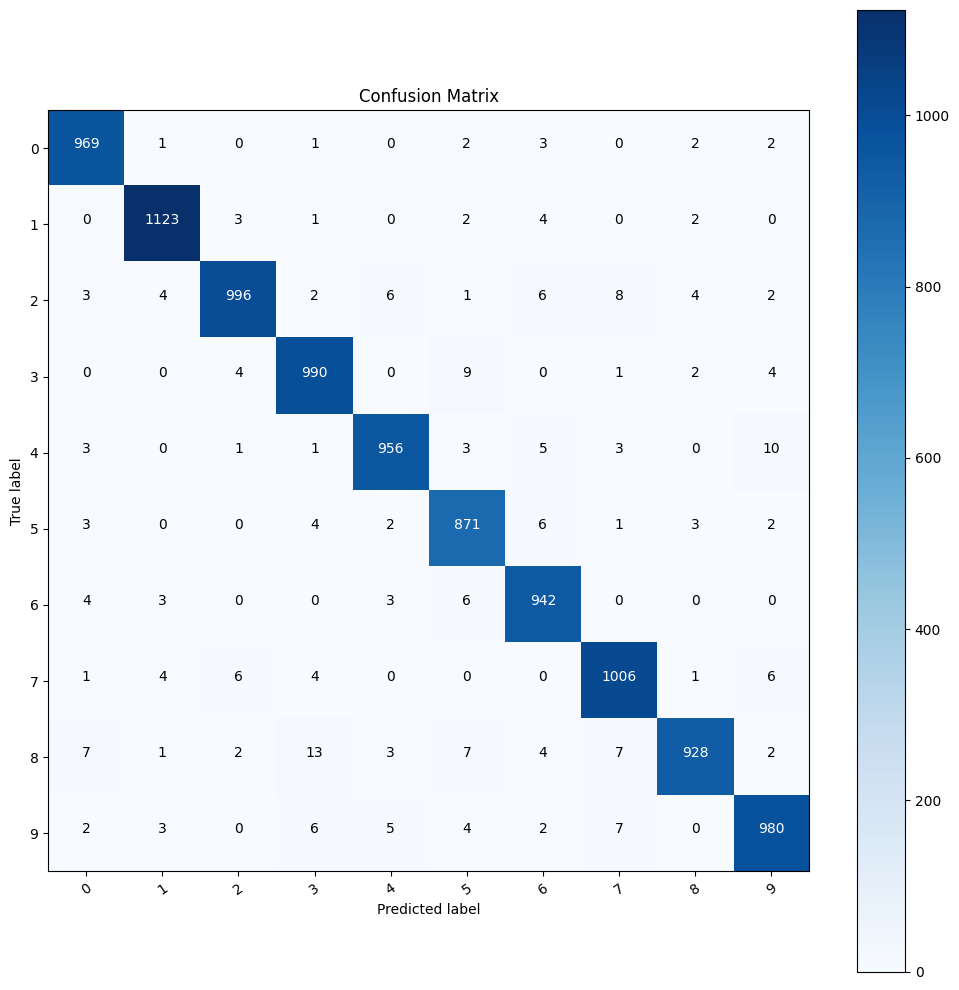

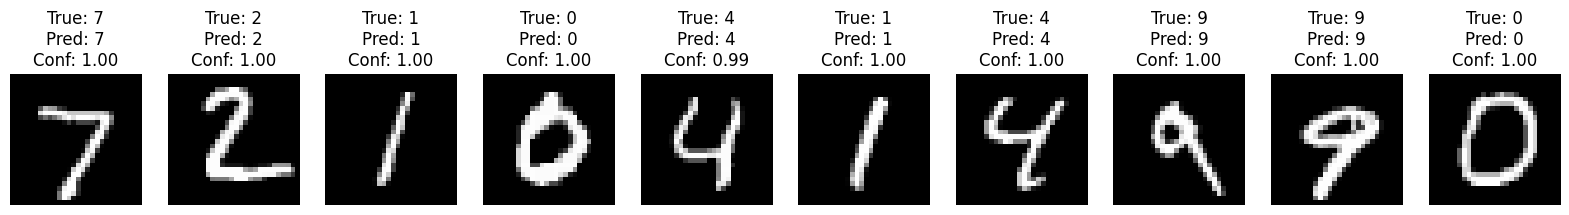

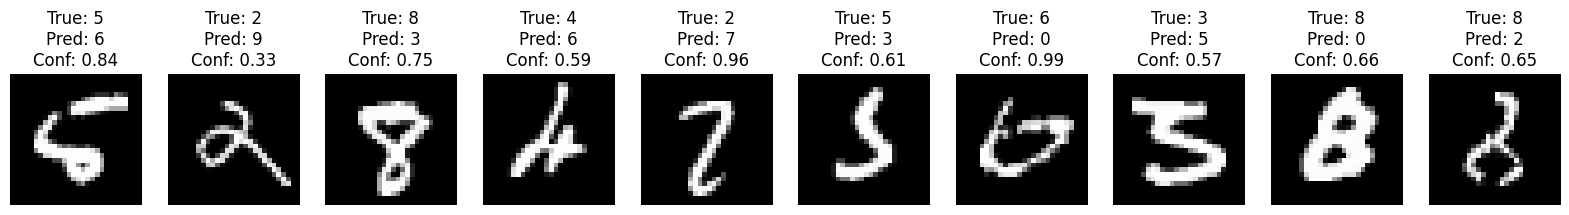

In [ ]:
cuda = torch.cuda.is_available()
batch_size = 1
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork()
if cuda:
  model.cuda()
model.eval()
model.load_state_dict(torch.load("MNIST_Network.pth"))

# Lists to store all predicted and true labels
all_predicted = []
all_labels = []


total_accuracy = 0.0
for idx, (images, labels) in enumerate(test_loader):

  if cuda:
      images = images.cuda()
      labels = labels.cuda()

  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)

  # Calculate accuracy for the current iteration
  accuracy = (predicted == labels).sum().item() / labels.size(0)

  total_accuracy += accuracy

  all_predicted.extend(predicted.cpu().numpy())
  all_labels.extend(labels.cpu().numpy())

  if idx % 500 == 0:
    print("Iter [%d/%d]. Accuracy: %0.4f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.4f" % (total_accuracy / len(test_loader)))


# Create and plot the confusion matrix
cm = confusion_matrix(all_labels, all_predicted)

# Function to plot the confusion matrix (same as before)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # ... (Function definition - same as previous response) ...
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=35)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()




correct_predictions = []
incorrect_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        if cuda:
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)  # Get probabilities
        _, predicted = torch.max(outputs.data, 1)
        confidence = probabilities[0, predicted.item()].item()  # Get confidence score

        if predicted.item() == labels.item():
            correct_predictions.append((images.cpu(), labels.cpu(), predicted.cpu(), confidence))
        else:
            incorrect_predictions.append((images.cpu(), labels.cpu(), predicted.cpu(), confidence))

# Visualize 10 correct and 10 incorrect predictions (if available)
num_samples_to_visualize = 10

# Correct predictions
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(20, 4))
for i, (image, label, prediction, confidence) in enumerate(correct_predictions[:num_samples_to_visualize]):
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title(f"True: {label.item()}\nPred: {prediction.item()}\nConf: {confidence:.2f}")
    axes[i].axis('off')
plt.show()

# Incorrect predictions (if any)
if incorrect_predictions:
    fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(20, 4))
    for i, (image, label, prediction, confidence) in enumerate(incorrect_predictions[:num_samples_to_visualize]):
        axes[i].imshow(image.squeeze().numpy(), cmap='gray')
        axes[i].set_title(f"True: {label.item()}\nPred: {prediction.item()}\nConf: {confidence:.2f}")
        axes[i].axis('off')
    plt.show()
else:
    print("No incorrect predictions found in the visualized samples.")

## Backpropagation

### ReLU Example

In [ ]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-defining-new-autograd-functions
class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

#### Sigmoid Function


In [ ]:
class MySigmoid(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        # Save the input for backward pass
        ctx.save_for_backward(input)
        # Compute the sigmoid output
        sigmoid_output = 1 / (1 + torch.exp(-input))
        return sigmoid_output

    @staticmethod
    def backward(ctx, grad_output):
        # Retrieve the saved input
        input, = ctx.saved_tensors
        # Compute the sigmoid of the input
        sigmoid_output = 1 / (1 + torch.exp(-input))
        # Compute the gradient using the sigmoid output
        grad_input = grad_output * sigmoid_output * (1 - sigmoid_output)
        return grad_input

#### Fully Connected Layer

In [ ]:
class MyLinearFunction(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input, weights, bias):
        # Save input and weights for backward pass (bias is not needed)
        ctx.save_for_backward(input, weights)
        # Compute forward pass: output = input @ weights + bias
        return torch.matmul(input, weights) + bias

    @staticmethod
    def backward(ctx, grad_output):
        # Retrieve saved tensors (input and weights)
        input, weights = ctx.saved_tensors

        # Gradient for input: grad_output @ weights^T
        grad_input = torch.matmul(grad_output, weights.t())  # Fixed typo: matual -> matmul

        # Gradient for weights: input^T @ grad_output
        grad_weights = torch.matmul(input.t(), grad_output)

        # Gradient for bias: sum grad_output over batch dimension (dim=0)
        grad_bias = grad_output.sum(dim=0)

        # Return gradients in order matching forward arguments: (input, weights, bias)
        return grad_input, grad_weights, grad_bias

class MyLinearLayer(nn.Module):
    def __init__(self, in_features=2, out_features=4):
        super(MyLinearLayer, self).__init__()
        self.weights = nn.Parameter(torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.zeros(out_features))
        self.linear_fn = MyLinearFunction.apply

    def forward(self, input):
        return self.linear_fn(input, self.weights, self.bias)


#### Testing Your Implementation

In [ ]:
class MyLinearNetwork(nn.Module):
  def __init__(self):
    super(MyLinearNetwork, self).__init__()
    self.linear_1 = MyLinearLayer(28 * 28, 128)
    self.sigmoid_fn = MySigmoid.apply
    self.linear_2 = MyLinearLayer(128, 10)
    self.softmax_fn = nn.Softmax(dim=1)

  def forward(self, x):
    size = x.size()
    x = x.reshape(size[0], -1) # Flatten images
    x = self.linear_1(x)
    x = self.sigmoid_fn(x)
    x = self.linear_2(x)
    if self.training == False:
      x = self.softmax_fn(x)
    return x

In [ ]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = MyLinearNetwork()
print(model)
if cuda:
  model.cuda()
n_epochs = 3
learning_rate = 0.2
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.7)
loss_fn = nn.CrossEntropyLoss()

model.train()
model.train()
for epoch in range(1, n_epochs + 1):
  total_loss = 0 # new line: to accumulate loss for the epoch
  total_correct = 0 # new line: to accumulate correct predictions for the epoch
  total_samples = 0 # new line: to accumulate total samples for the epoch
  for idx, (images, labels) in enumerate(train_loader):
    # WRITE YOUR CODE TO COMPUTE OUTPUTS, LOSS, ACCURACY, AND OPTIMIZE MODEL
    # outptus = ???
    # loss = ???
    # accuracy = ???
    # optimize the model
    if cuda:
        images = images.cuda()
        labels = labels.cuda()

    outputs = model(images)
    loss = loss_fn(outputs, labels)

    # Calculate accuracy for the current batch
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()

    # Update accumulators for the epoch
    total_loss += loss.item() * labels.size(0)
    total_correct += correct
    total_samples += labels.size(0)

    optim.zero_grad()
    loss.backward()
    optim.step()

    if idx % 100 == 0:
      # Calculate and print accuracy for the current batch
      accuracy = correct / labels.size(0)
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

  # Calculate and print total accuracy and average loss for the epoch
  epoch_accuracy = total_correct / total_samples
  epoch_loss = total_loss / total_samples
  print(f"Epoch [{epoch}/{n_epochs}] Completed - Accuracy: {epoch_accuracy:.4f}, Average Loss: {epoch_loss:.4f}")

MyLinearNetwork(
  (linear_1): MyLinearLayer()
  (linear_2): MyLinearLayer()
  (softmax_fn): Softmax(dim=1)
)
Epoch [1/3]. Iter [1/1875]. Loss: 12.66. Accuracy: 0.12
Epoch [1/3]. Iter [101/1875]. Loss: 1.28. Accuracy: 0.59
Epoch [1/3]. Iter [201/1875]. Loss: 0.91. Accuracy: 0.72
Epoch [1/3]. Iter [301/1875]. Loss: 0.38. Accuracy: 0.81
Epoch [1/3]. Iter [401/1875]. Loss: 0.67. Accuracy: 0.81
Epoch [1/3]. Iter [501/1875]. Loss: 0.19. Accuracy: 0.94
Epoch [1/3]. Iter [601/1875]. Loss: 0.42. Accuracy: 0.91
Epoch [1/3]. Iter [701/1875]. Loss: 0.30. Accuracy: 0.91
Epoch [1/3]. Iter [801/1875]. Loss: 0.30. Accuracy: 0.94
Epoch [1/3]. Iter [901/1875]. Loss: 0.38. Accuracy: 0.88
Epoch [1/3]. Iter [1001/1875]. Loss: 0.83. Accuracy: 0.81
Epoch [1/3]. Iter [1101/1875]. Loss: 0.57. Accuracy: 0.84
Epoch [1/3]. Iter [1201/1875]. Loss: 0.58. Accuracy: 0.84
Epoch [1/3]. Iter [1301/1875]. Loss: 0.15. Accuracy: 0.97
Epoch [1/3]. Iter [1401/1875]. Loss: 0.57. Accuracy: 0.84
Epoch [1/3]. Iter [1501/1875]. 